<a href="https://colab.research.google.com/github/rizkyirw/Shipment-Expedition/blob/main/Data_Understanding_%26_Preparation_Shipment_Expedition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kriteria:
1. Business Understanding
Minimum:
Mampu menentukan objective analisis

Maximum:
Mampu juga menjelaskan jenis bisnis apa yang sedang berlangsung dari dataset tsb dan jelaskan mengapa dapat dikatakan jenis bisnis tsb.

2. Data Understanding
Minimum:
Mampu melakukan data audit terhadap data yang kotor

Maximum:
Mampu juga melakukan initial EDA

3. Data Preparation
Minimum:
Mampu melakukan treatment terhadap data yang kotor

Maximum:
Mampu juga menjelaskan pertimbangan apa yang digunakan ketika memilih suatu metode untuk treatment data kotor tsb.
Misal, teman2 lebih memilih untuk melakukan dropping missing value instead of filling missing value. Jelaskan kenapa.

4. Modeling/Deep EDA
Minimum:
Mampu melakukan analisis melalui visualisasi data yang tepat.

Maximum:
Mampu juga membangun analisis yang terstruktur dan sistematis sehingga terbangun suatu story dan rekomendasi dari analisis yang dilakukan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Train - Train (1).csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Train.csv")

In [ ]:
df .head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4.0,2,177,3,low,F,44.0,1233,1
1,2,F,Flight,4.0,5,216,2,low,M,59.0,3088,1
2,3,A,Flight,2.0,2,183,4,low,M,48.0,3374,1
3,4,B,Flight,3.0,3,176,4,medium,M,10.0,1177,1
4,5,C,Flight,2.0,2,184,3,medium,F,46.0,2484,1


### Data Understanding

### Checking data row and column

In [ ]:
df.shape

(11005, 12)

*   Dari dataset Train.csv terdapat 11005 baris dan 12 kolom

### Checking column name

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

*   Dari dataset Train.csv terdapat 12 kolom yaitu ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases Product_importance, Gender', 'Discount_offered, Weight_in_gms, Reached.on.Time_Y.N

### Checking data types

In [ ]:
df.dtypes

ID                       int64
Warehouse_block         object
Mode_of_Shipment        object
Customer_care_calls    float64
Customer_rating          int64
Cost_of_the_Product      int64
Prior_purchases          int64
Product_importance      object
Gender                  object
Discount_offered       float64
Weight_in_gms            int64
Reached.on.Time_Y.N      int64
dtype: object

*   Terdapat dua jenis data types numeric yaitu integer dan float pada 8 kolom.
*   Terdapat data types string pada empat kolom.



### Review unique characters

In [ ]:
df.nunique()

ID                     10999
Warehouse_block            6
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      216
Prior_purchases            8
Product_importance         3
Gender                     4
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        3
dtype: int64

### Review null data

In [ ]:
df.isnull().sum()

ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls     22
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance       0
Gender                   0
Discount_offered       100
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64

*   Terdapat null data (nilai kosong) pada kolom Customer_care_calls dan Discount_offered, masing-masing sebesar 22 dan 100

### Review not null data

In [ ]:
df.notnull().sum()

ID                     11005
Warehouse_block        11005
Mode_of_Shipment       11005
Customer_care_calls    10983
Customer_rating        11005
Cost_of_the_Product    11005
Prior_purchases        11005
Product_importance     11005
Gender                 11005
Discount_offered       10905
Weight_in_gms          11005
Reached.on.Time_Y.N    11005
dtype: int64

*   Seperti penjelasan pada null data sebelumnya bahwa terdapat null data pada kolom Customer_care_calls dan Discount_offered. Hal ini terbukti disini bahwa hanya kedua kolom tersebut yang berjumlah kurang dari 11005. 



### Outliers

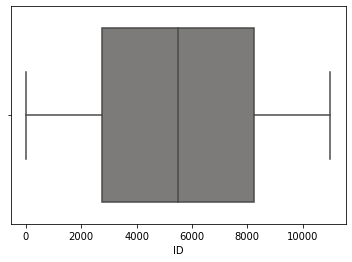

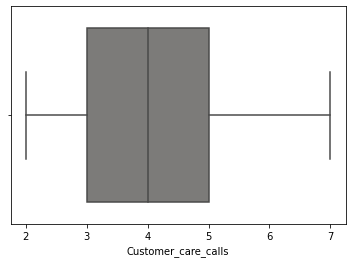

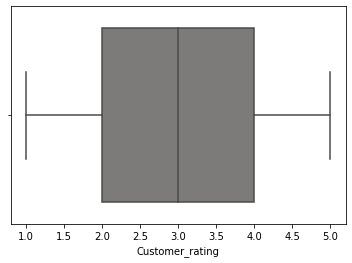

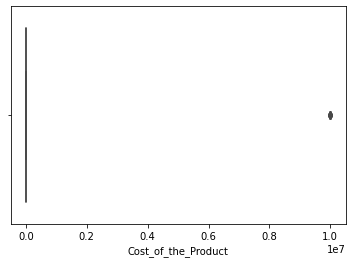

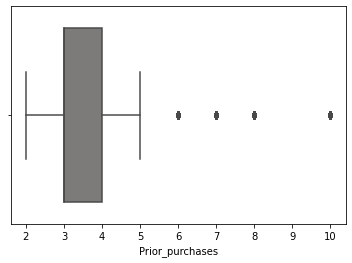

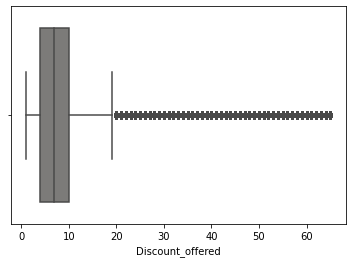

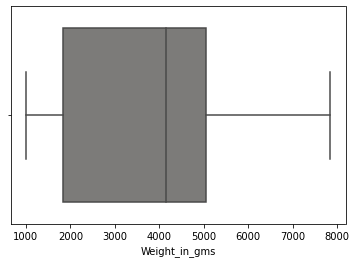

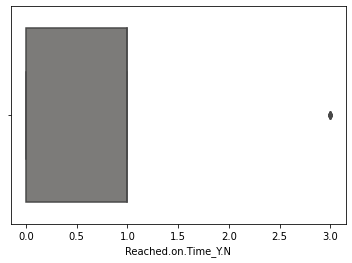

In [ ]:
for col in ['ID', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], palette='cividis')

*   Terdapat outliers pada Reached on time dimana ada variabel berbeda yaitu 3. Reached on time harusnya memiliki dua variabel yaitu 0 dan 1 yang mengindikasikan apakah produk sampai tepat waktu atau tidak tepat waktu
*   Terdapat outliers pada Warehouse block dimana seharusnya hanya terdiri dari block A, B, C, D, dan F tetapi terdapat block tambahan yaitu ZX
*  Kebanyakan customer memiliki 3 atau 4 prior products tetapi ada juga customer yang memiliki kurang atau lebih dari 3 atau 4 prior products 
*   terdapat inkonsistensi penggunaan nama variable pada gender yaitu F, M, Female dan Male
*  Discount offered paling banyak/sering diberikan sebesar 4 hingga 10 tetapi terdapat discount yang lebih kecil dan lebih besar dari 10

### Checking duplicate values

In [ ]:
duplicate = df[df.duplicated()]
print('data duplicate')
duplicate

data duplicate


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N




*   Terdapat enam baris yang memiliki duplicate data, di mana ID 21 dan 109 masing-masing memiliki tiga baris data yang sama.



### Initial EDA

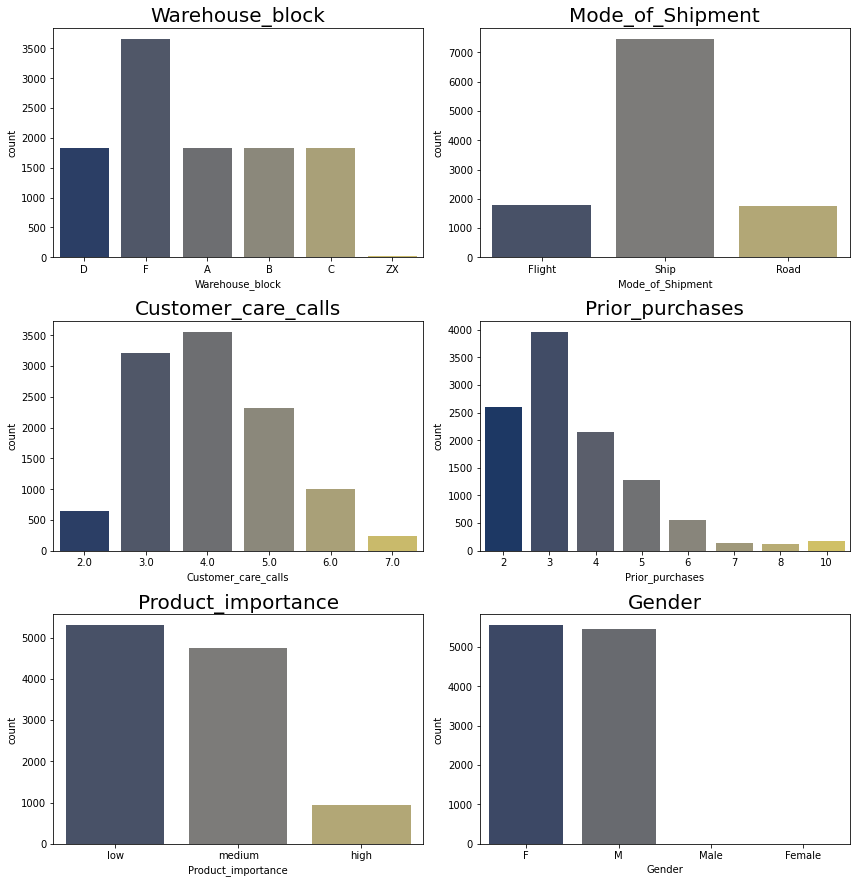

In [ ]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
        'Prior_purchases', 'Product_importance', 'Gender']

plt.figure(figsize = (12, 16))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='cividis')
        plt.title(f'{cols[i]}', fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

*   Warehouse F memiliki lebih banyak menyimpan barang dibandingkan dengan warehouse lainnya
*   Mode of shipment dengan kapal lebih banyak digunakan untuk mengantarkan barang ke customer
*  Customer cenderung menghubungi customer care calls sebanyak 3 atau 4 kali
*   Customer rating tidak memiliki banyak perbedaan
*   Sebagian besar pelanggan memiliki 3 pembelian sebelumnya
*   Kebanyakan produk memiliki tingkat kepentingan yang rendah
*   Gender berisi F dan M dengan customer masing-masing lebih dari 5000 customer
*   Lebih banyak produk yang sampai tepat waktu dibandingkan produk yang tidak tepat waktu

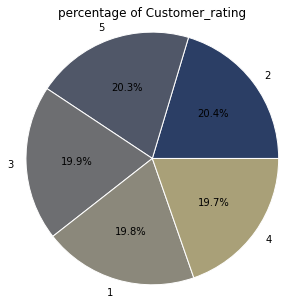

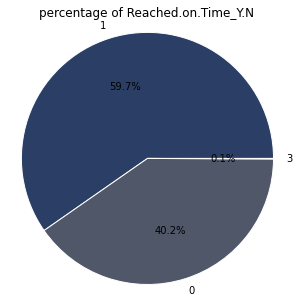

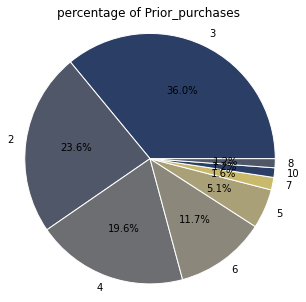

In [ ]:
colors = ['#2B3E65', '#505768', '#6D6E71', '#8B887B', '#A9A078', '#C9BA6B']

for col in ['Customer_rating','Reached.on.Time_Y.N', 'Prior_purchases']:
  plt.figure(figsize=(5,5))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), labeldistance=1.1, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(f'percentage of {col}')
plt.show()

### Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11005 non-null  int64  
 1   Warehouse_block      11005 non-null  object 
 2   Mode_of_Shipment     11005 non-null  object 
 3   Customer_care_calls  10983 non-null  float64
 4   Customer_rating      11005 non-null  int64  
 5   Cost_of_the_Product  11005 non-null  int64  
 6   Prior_purchases      11005 non-null  int64  
 7   Product_importance   11005 non-null  object 
 8   Gender               11005 non-null  object 
 9   Discount_offered     10905 non-null  float64
 10  Weight_in_gms        11005 non-null  int64  
 11  Reached.on.Time_Y.N  11005 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


In [ ]:
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,11005.000000,10983.000000,11005.000000,1.100500e+04,11005.000000,10905.000000,11005.000000,11005.000000
mean,5497.036801,4.052354,2.991095,9.296761e+03,3.567015,13.205777,3633.337937,0.598819
std,3176.951036,1.140826,1.413607,3.013132e+05,1.522694,16.084945,1635.315267,0.494038
min,1.000000,2.000000,1.000000,9.600000e+01,2.000000,1.000000,1001.000000,0.000000
25%,2746.000000,3.000000,2.000000,1.690000e+02,3.000000,4.000000,1839.000000,0.000000
50%,5497.000000,4.000000,3.000000,2.140000e+02,3.000000,7.000000,4148.000000,1.000000
75%,8248.000000,5.000000,4.000000,2.510000e+02,4.000000,10.000000,5049.000000,1.000000
max,10999.000000,7.000000,5.000000,1.000000e+07,10.000000,65.000000,7846.000000,3.000000


Note :

- Terdapat indikasi missing value dari perbedaan jumlah record pada kolom `Customer_care_calls` dan `Discount_offered` dengan jumlah record kolom lain pada umumnya, sedangkan nilai yang sangat tinggi terdapat pada kolom `Cost_of_the_product` mengindikasikan terdapat outliers pada kolom tersebut.

### Checking Null values using Heatmap

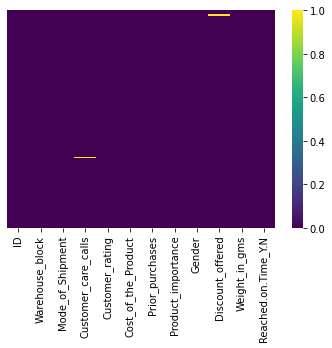

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

- Dari Heatmap tersebut dapat diketahui bahwa lokasi `Null Values` terdapat pada kolom `Customer_care_calls` dan `Discount_offered`. Tebal heatmap dari  `Discount_offered` cukup terlihat, dapat kita indikasikan bahwa `Null Values` pada kolom tersebut cukup banyak

In [ ]:
df[df['Customer_care_calls'].isna()] 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
7452,7447,D,Ship,NaN,2,174,3,medium,F,10.0,4902,1
7453,7448,F,Ship,NaN,1,152,7,low,F,5.0,5325,1
7454,7449,A,Ship,NaN,5,223,5,medium,M,4.0,4704,0
7455,7450,B,Ship,NaN,2,223,5,low,M,2.0,1232,1
7456,7451,C,Ship,NaN,4,239,5,low,M,6.0,1986,1
7457,7452,F,Ship,NaN,1,246,6,low,M,4.0,1489,0
7458,7453,D,Ship,NaN,4,295,4,low,F,10.0,1217,1
7459,7454,F,Ship,NaN,5,305,4,low,F,6.0,1787,1
7460,7455,A,Ship,NaN,3,177,4,medium,F,4.0,1560,1
7461,7456,B,Ship,NaN,3,257,5,low,F,8.0,1409,0


In [ ]:
df[df['Discount_offered'].isna()]

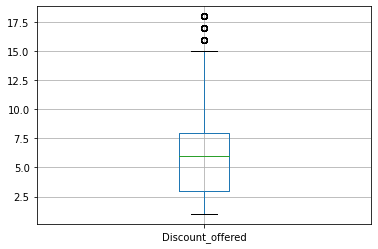

In [ ]:
df.boxplot(column='Discount_offered')

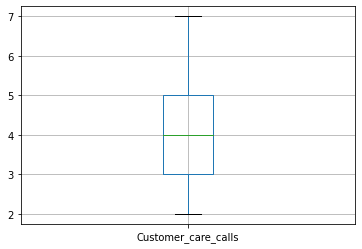

In [ ]:
df.boxplot(column='Customer_care_calls')

- Setelah kita amati pada 2 kolom diatas menggunakan boxplot, dapat diketahui bahwa pada kolom `Discount_offered` outliers tecetak tebal dari nilai 20 sampai 60 lebih yang mana outliers pada kolom tersebut akan berpengaruh pada proses pengolahan data dibandingkan kolom `Customer_care_calls` 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


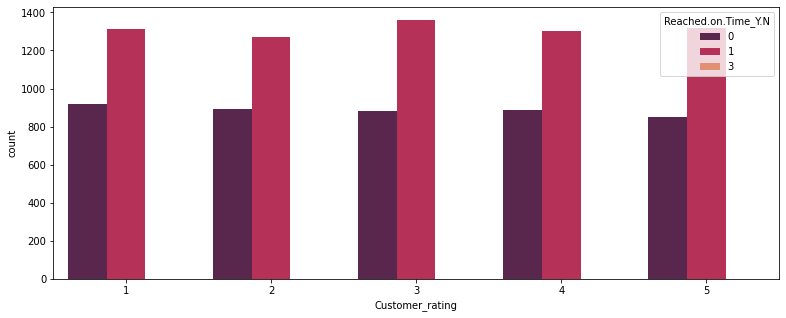

In [ ]:
plt.figure(figsize = (13, 5))
sns.countplot('Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


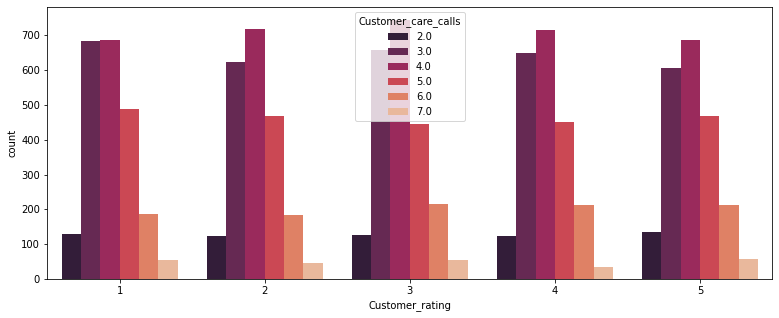

In [ ]:
plt.figure(figsize = (13, 5))
sns.countplot('Customer_rating', hue = 'Customer_care_calls', data = df, palette='rocket')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


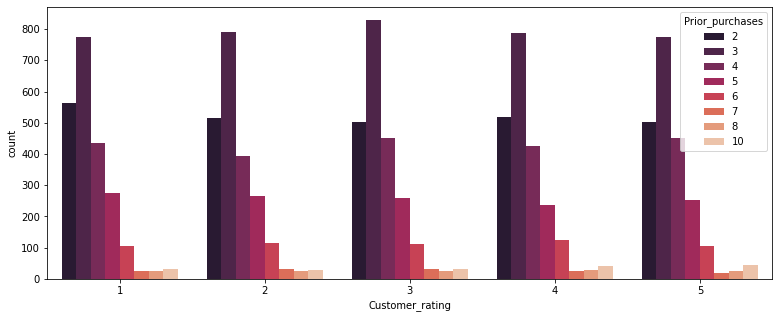

In [ ]:
plt.figure(figsize = (13, 5))
sns.countplot('Customer_rating', hue = 'Prior_purchases', data = df, palette='rocket')
plt.show()

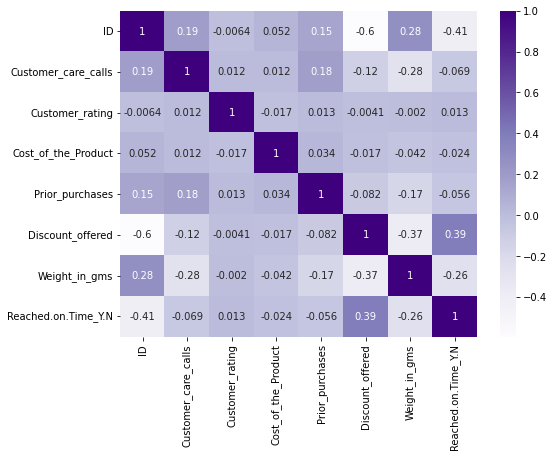

In [ ]:
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap='Purples')
plt.show()

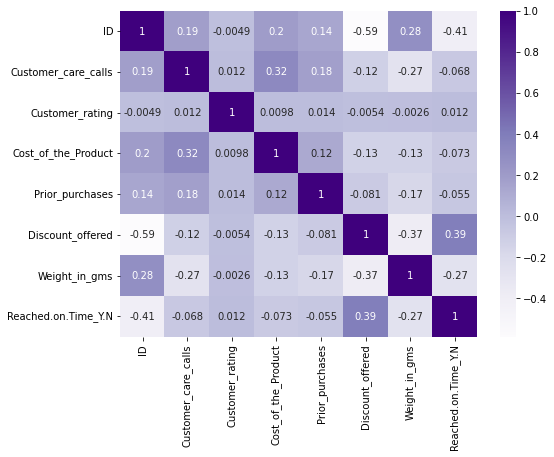

In [ ]:
# Setelah Cleaning
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap='Purples')
plt.show()

## Data Preparation

### Fill Missing Value from `Customer_care_calls` & `Discount_offered`

Mengisi value null pada column Customer care calls dan Discount offered dengan value rata-rata yang terdapat dari column masing-masing dengan nilai statis dari data awal yang telah ditentukan hingga data terakhir.

In [ ]:
# Customer_care_calls
rata_care = df['Customer_care_calls'].mean()
df['Customer_care_calls'] = df['Customer_care_calls'].fillna(rata_care)
df['Customer_care_calls'].isna().sum()

0

In [ ]:
# Discount_offered
rata_diskon = df['Discount_offered'].mean()
df['Discount_offered'] = df['Discount_offered'].fillna(rata_diskon)
df['Discount_offered'].isna().sum()

0

In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Drop Data Duplicate

Menghapus data duplikat agar tidak terjadi redudansi data

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Tampilan setelah dilakukan drop duplicate
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


### Fix `Female` & `Male` Replace to `F` & `M`

Terdapat kata `Female` & `Male` pada dataset yang seharusnya tercetak `F` & `M`

In [ ]:
df['Gender'] = df['Gender'].str.replace("Female","F")
df['Gender'] = df['Gender'].str.replace("Male","M")

In [ ]:
# Tampilan isi kolom setelah dilakukan inisialisasi ulang
df.Gender.unique()

array(['F', 'M'], dtype=object)

### Cleaning Outliers `Cost_of_the_Product` dengan Metode IQR

Terdapat outliers yang tinggi dari kolom tersebut yang dapat menyebabkan anomali data

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,1.099900e+04,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.052655,2.990545,9.301724e+03,3.567597,13.187615,3634.016729,0.598600
std,3175.28214,1.139863,1.413603,3.013953e+05,1.522860,15.995925,1635.377251,0.494084
min,1.00000,2.000000,1.000000,9.600000e+01,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,1.695000e+02,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,2.140000e+02,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,2.510000e+02,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,1.000000e+07,10.000000,65.000000,7846.000000,3.000000


In [ ]:
q1 = df['Cost_of_the_Product'].quantile(0.25)
q3 = df['Cost_of_the_Product'].quantile(0.75)
upper_limit = q3 + 1.5 * (q3-q1)
lower_limit = q1 - 1.5 * (q3-q1)

In [ ]:
df = df[df['Cost_of_the_Product'] > lower_limit]
df = df[df['Cost_of_the_Product'] < upper_limit]

In [ ]:
# Tampilan isi kolom setelah dilakukan inisialisasi ulang

df['Cost_of_the_Product'].unique()

array([177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198,
       275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234,
       266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169,
       160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261,
       202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185,
       278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168,
       265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237,
       264, 248, 191, 146, 135,  98,  97, 114, 112, 274, 166, 148, 270,
       242, 192, 116, 255, 209, 134, 130, 133, 140, 136, 142, 154, 155,
       127, 129, 159, 294, 226, 258, 241, 208, 182, 115, 212, 171, 249,
       243, 163, 272, 138, 273, 279, 173, 194, 262, 201, 260, 188, 267,
       131, 122, 103, 199, 236, 167, 259, 178, 123, 124,  96, 244, 254,
       128, 204, 245, 228, 268, 108, 276, 214, 281, 253, 104, 240, 121,
       153, 111, 117, 195, 110, 119, 196, 291, 118, 283, 100, 25

In [ ]:
# Fix Data type Customer_care_calls from Float to Int
df['Customer_care_calls'] = df['Customer_care_calls'].astype('int')

In [ ]:
# Tampilan isi kolom setelah dilakukan inisialisasi ulang

df['Customer_care_calls'].unique()

array([4, 2, 3, 5, 6, 7])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10967 entries, 0 to 10994
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10967 non-null  int64  
 1   Warehouse_block      10967 non-null  object 
 2   Mode_of_Shipment     10967 non-null  object 
 3   Customer_care_calls  10967 non-null  int64  
 4   Customer_rating      10967 non-null  int64  
 5   Cost_of_the_Product  10967 non-null  int64  
 6   Prior_purchases      10967 non-null  int64  
 7   Product_importance   10967 non-null  object 
 8   Gender               10967 non-null  object 
 9   Discount_offered     10967 non-null  float64
 10  Weight_in_gms        10967 non-null  int64  
 11  Reached.on.Time_Y.N  10967 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB


In [ ]:
# Outliers pada kolom Warehouse_block
df[df.Warehouse_block == 'ZX']

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [ ]:
# Drop yang memiliki value 'ZX' pada kolom Warehouse_block 

df.drop(df[df['Warehouse_block'] == 'ZX'].index, inplace = True)

In [ ]:
# Tampilan isi kolom setelah dilakukan inisialisasi ulang

df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C', 'ZX'], dtype=object)

In [ ]:
# Outliers pada kolom Reached.on.Time_Y.N
df[df['Reached.on.Time_Y.N'] == 3]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [ ]:
# Drop yang memiliki value '3' pada kolom Reached.on.Time_Y.N

df.drop(df[df['Reached.on.Time_Y.N'] == 3].index, inplace = True)

In [ ]:
# Tampilan isi kolom setelah dilakukan inisialisasi ulang

df['Reached.on.Time_Y.N'].unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10982 entries, 0 to 10994
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10982 non-null  int64  
 1   Warehouse_block      10982 non-null  object 
 2   Mode_of_Shipment     10982 non-null  object 
 3   Customer_care_calls  10982 non-null  int64  
 4   Customer_rating      10982 non-null  int64  
 5   Cost_of_the_Product  10982 non-null  int64  
 6   Prior_purchases      10982 non-null  int64  
 7   Product_importance   10982 non-null  object 
 8   Gender               10982 non-null  object 
 9   Discount_offered     10982 non-null  float64
 10  Weight_in_gms        10982 non-null  int64  
 11  Reached.on.Time_Y.N  10982 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB


### Visualisasi Sesudah Cleaning

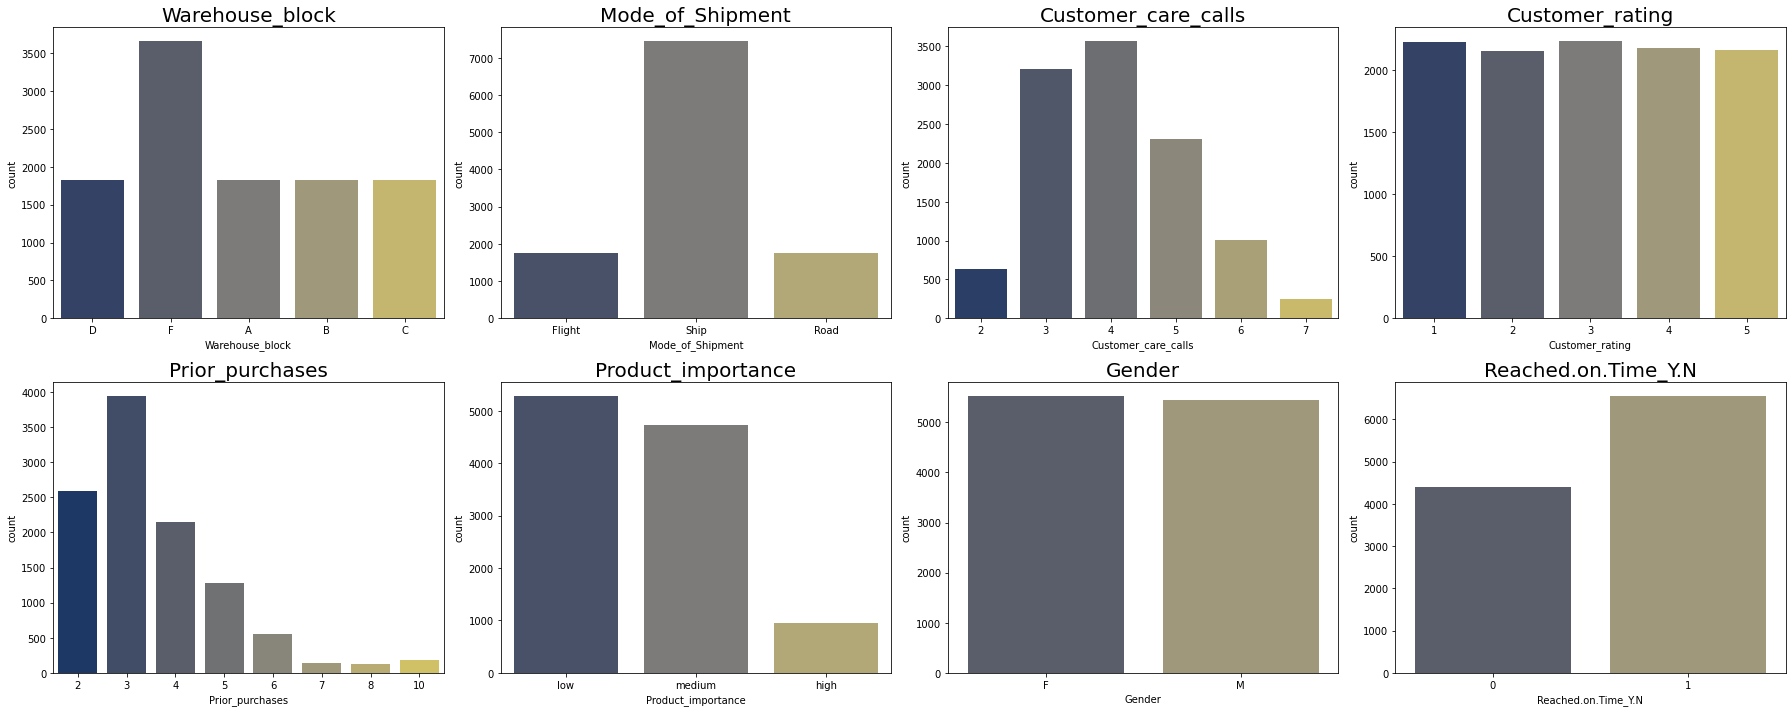

In [ ]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (25, 10))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(2, 4, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='cividis')
        plt.title(f'{cols[i]}', fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11005 non-null  int64  
 1   Warehouse_block      11005 non-null  object 
 2   Mode_of_Shipment     11005 non-null  object 
 3   Customer_care_calls  10983 non-null  float64
 4   Customer_rating      11005 non-null  int64  
 5   Cost_of_the_Product  11005 non-null  int64  
 6   Prior_purchases      11005 non-null  int64  
 7   Product_importance   11005 non-null  object 
 8   Gender               11005 non-null  object 
 9   Discount_offered     10905 non-null  float64
 10  Weight_in_gms        11005 non-null  int64  
 11  Reached.on.Time_Y.N  11005 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


### EDA

Tujuan : Mengukur apakah customer itu menggunakan jasa kita kembali berpatokan pada customer rating. Statement kalau costumer rating tinggi akan menggunakan jasa kita kembali, kalau rendah sebaliknya.

•	Customer rating, prior purchases = untuk membuktikan bahwa customer rating tinggi cenderung akan menggunakan jasa perusahaan kembali.

•	Customer rating, reached on time = untuk membuktikan bahwa ketepatan waktu pengiriman berpengaruh pada customer rating.

	Reached on time, mode of shipment, cost of the product untuk mengukur apakah ketepatan waktu ditentukan dengan harga dan shipment yang digunakan.
	Cost of the product, wight in gms, product important = mengukur apakah hargga produk ditentukan dari berat dan kepentingan produk. 

•	Customer rating, diskon, prior purchases = apakah dengan adanya diskon membuat customer memberikan rating tinggi pada perusahaan kita.

- Customer rating, prior purchases
- Customer rating, reached on time
- Customer rating, diskon, prior purchases
- Customer rating, customer care calls

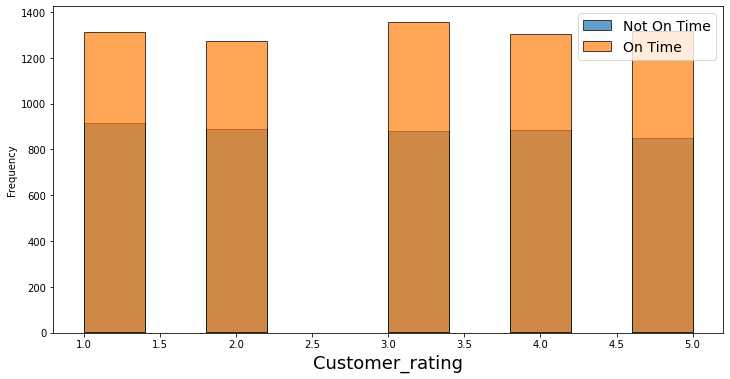

In [ ]:
#Customer rating, Customer care calls dengan Reached on time

plt.figure(figsize = (12, 6))
fig = df.groupby('Reached.on.Time_Y.N')['Customer_rating'].plot.hist(histtype= 'bar', alpha = 0.7, ec="black")
plt.legend(('Not On Time','On Time'), fontsize = 14)
plt.xlabel('Customer_rating', fontsize = 18)
plt.show()

# plt.figure(figsize = (13, 5))
# sns.countplot('Customer_rating', hue = 'Customer_care_calls', data = df, palette='cividis')
# plt.show()

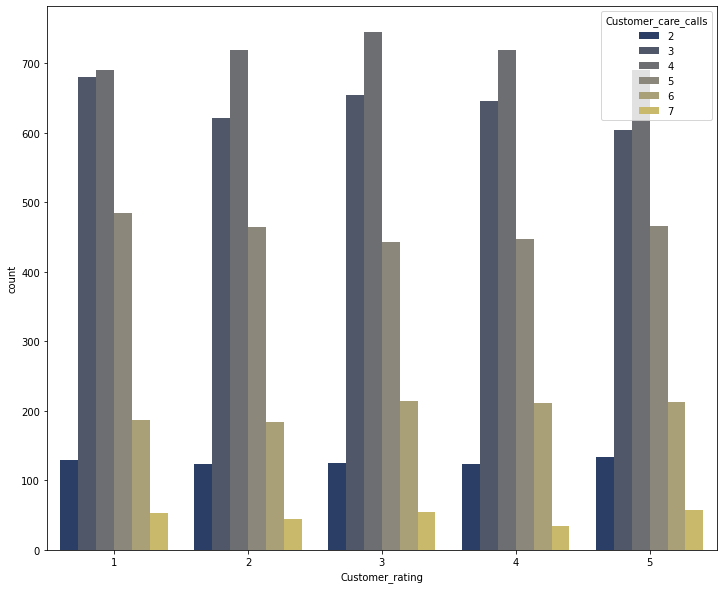

In [ ]:
#Customer rating, 
plt.figure(figsize = (12, 10))
sns.countplot(x = 'Customer_rating', hue = 'Customer_care_calls', data = df,
            palette = 'cividis')
plt.show()

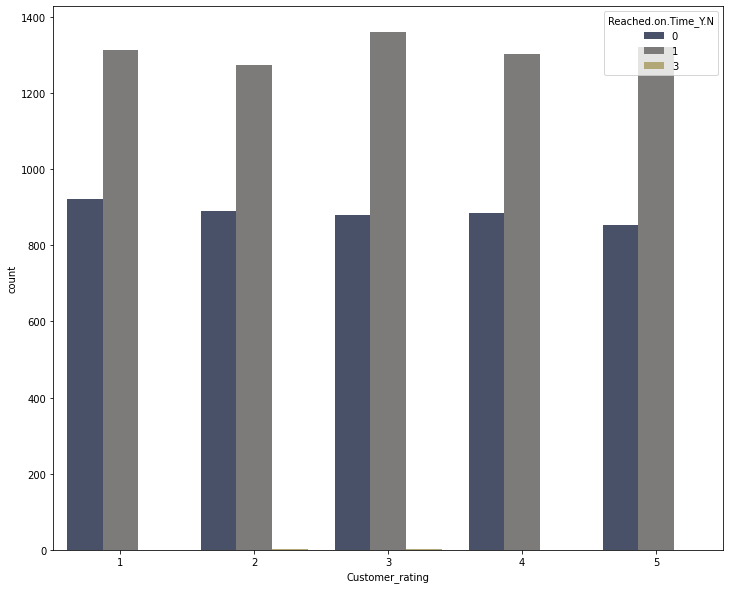

In [ ]:
#Customer rating, reached on time
plt.figure(figsize = (12, 10))
sns.countplot(x = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df,
            palette = 'cividis')
plt.show()

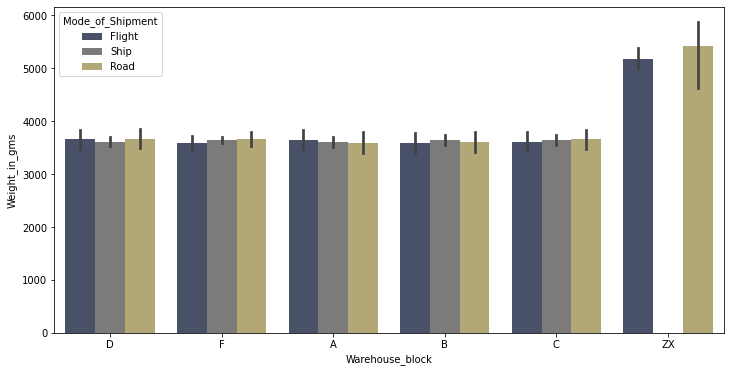

In [ ]:
#Warehouse block, wight, mode of shipment. 

plt.figure(figsize = (12, 6))
sns.barplot(x = 'Warehouse_block', y = 'Weight_in_gms', data = df, hue = 'Mode_of_Shipment',
            palette = 'cividis')
plt.show()

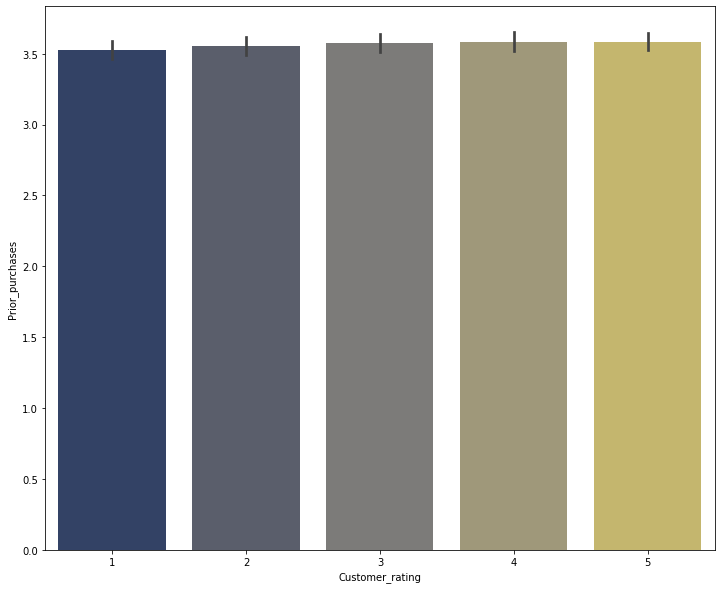

In [ ]:
# Customer rating, prior purchases

plt.figure(figsize = (12, 10))
sns.barplot(x = 'Customer_rating', y = 'Prior_purchases', data = df,
            palette = 'cividis')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


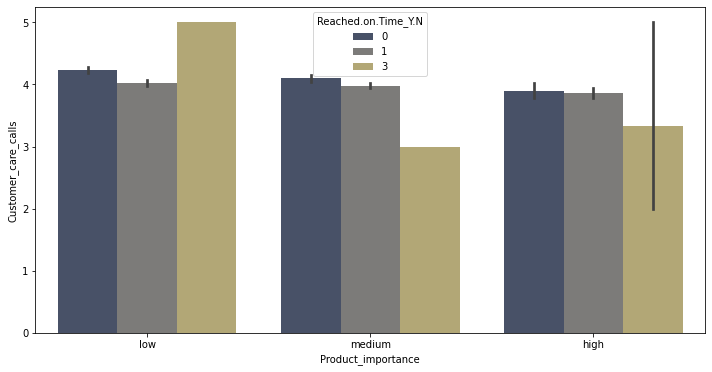

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot('Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette = 'cividis')
plt.show()

- Customer care were more when product importance is less.
- When importance of product is low or medium then more of the products weren't reached on time but when importance of product is high then products reached on time or not reached on time are almost equal.

In [ ]:
# 

- 